## Load data and packages


In [ ]:
#Load packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/fbhsaid/DAV6300/main/Content%20Based%20Recommender%20Data.csv')
df

,Brand,Olivia,ZJY,LHR,ZHC,ZYC,Tianen,Features,Years
0,Huawei,NaN,4.0,5.0,4.0,3.0,5.0,"Camera, Operating System, Battery Life",14
1,Xiaomi,5.0,3.0,3.0,3.0,4.0,4.0,"Price to Performance, Battery Life",12
2,Vivo,NaN,NaN,NaN,3.5,NaN,NaN,"Price to Performance, Battery Life, Fast Charge",12
3,Apple,4.5,4.0,4.0,4.5,3.0,4.5,"Camera, Operating System, Design",16
4,Samsung,3.0,4.0,NaN,3.5,3.0,4.0,Design,14
5,Sony,NaN,NaN,NaN,2.5,NaN,NaN,"Camera, Design",15


## Using Bag-of-Words for phone recommendation

### Vectorizing first

In [ ]:
# Create a bag-of-words matrix
cv = CountVectorizer(stop_words='english')
bow_matrix = cv.fit_transform(df['Features'])
# Print out bag-of-words matrix and index for words in 'features'
print(cv.vocabulary_)
print(bow_matrix)

{'camera': 1, 'operating': 6, 'battery': 0, 'life': 5, 'price': 8, 'performance': 7, 'fast': 4, 'charge': 2, 'design': 3}
  (0, 1)	1
  (0, 6)	1
  (0, 0)	1
  (0, 5)	1
  (1, 0)	1
  (1, 5)	1
  (1, 8)	1
  (1, 7)	1
  (2, 0)	1
  (2, 5)	1
  (2, 8)	1
  (2, 7)	1
  (2, 4)	1
  (2, 2)	1
  (3, 1)	1
  (3, 6)	1
  (3, 3)	1
  (4, 3)	1
  (5, 1)	1
  (5, 3)	1


### Create similiarity matrix and define recommender function

In [ ]:
# Compute cosine similarity matrix
cosine_sim_bow = cosine_similarity(bow_matrix, bow_matrix)

# Define a function to get top recommendations using bag-of-words
def get_recommendations_bow(brand, top=5):
    # Get index of the phone with the given brand
    phone_index = df[df['Brand'] == brand].index[0]

    # Get pairwise similarities of the given brand with all others
    sim_scores = list(enumerate(cosine_sim_bow[phone_index]))

    # Sort the brands based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top similar phones
    sim_scores = sim_scores[1:top+1]

    # Get the top silimiar phones' indices
    phone_indices = [i[0] for i in sim_scores]

    # Return the top similar phones
    return df['Brand'].iloc[phone_indices]

# Test the bag of words recommender with Huawei
get_recommendations_bow('Huawei')

3      Apple
1     Xiaomi
2       Vivo
5       Sony
4    Samsung
Name: Brand, dtype: object

### Creating dataframe for easy visualization and alternative recommender function

In [ ]:
# Convert bag-of-words matrix into dataframe and print it out
sim_bow_df = pd.DataFrame(cosine_sim_bow, columns=df['Brand'], index=df['Brand'])
sim_bow_df

Brand,Huawei,Xiaomi,Vivo,Apple,Samsung,Sony
Brand,,,,,,
Huawei,1.000000,0.500000,0.408248,0.577350,0.000000,0.353553
Xiaomi,0.500000,1.000000,0.816497,0.000000,0.000000,0.000000
Vivo,0.408248,0.816497,1.000000,0.000000,0.000000,0.000000
Apple,0.577350,0.000000,0.000000,1.000000,0.577350,0.816497
Samsung,0.000000,0.000000,0.000000,0.577350,1.000000,0.707107
Sony,0.353553,0.000000,0.000000,0.816497,0.707107,1.000000


### Creating Visualization

<AxesSubplot:xlabel='Brand', ylabel='Brand'>

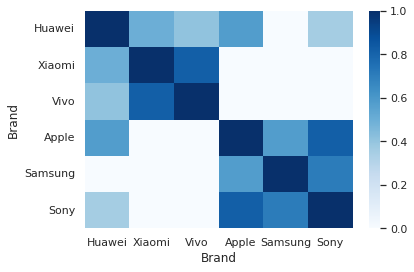

In [ ]:
# Import seaborn and use their heatmap to visualize bag-of-words' similiarity
import seaborn as sns
sns.set_theme()
sns.heatmap(sim_bow_df, cmap="Blues")

### Creating alternative recommender function

In [ ]:
# Define function to get recommendation using bag of words from newly created dataframe
def get_recommendations_bow_df(brand):
    return sim_bow_df.filter([brand]).sort_values(brand, ascending=False)
get_recommendations_bow_df('Huawei') 

Brand,Huawei
Brand,
Huawei,1.000000
Apple,0.577350
Xiaomi,0.500000
Vivo,0.408248
Sony,0.353553
Samsung,0.000000


## Repeat process for tf-idf method

### Vectorizing first

In [ ]:
# Create a tf-idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Features'])
# Print out tf-idf matrix and index for words in 'features'
print(tfidf.vocabulary_)
print(tfidf_matrix)

{'camera': 1, 'operating': 6, 'battery': 0, 'life': 5, 'price': 8, 'performance': 7, 'fast': 4, 'charge': 2, 'design': 3}
  (0, 5)	0.4765721883198389
  (0, 0)	0.4765721883198389
  (0, 6)	0.5644792715061554
  (0, 1)	0.4765721883198389
  (1, 7)	0.5402975346265833
  (1, 8)	0.5402975346265833
  (1, 5)	0.45615630443570127
  (1, 0)	0.45615630443570127
  (2, 2)	0.482050046189768
  (2, 4)	0.482050046189768
  (2, 7)	0.3952879336971141
  (2, 8)	0.3952879336971141
  (2, 5)	0.3337292352220711
  (2, 0)	0.3337292352220711
  (3, 3)	0.5420919460564738
  (3, 6)	0.642084608164228
  (3, 1)	0.5420919460564738
  (4, 3)	1.0
  (5, 3)	0.7071067811865476
  (5, 1)	0.7071067811865476


### Create similiarity matrix and recommender function

In [ ]:
# Compute cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get top recommendations
def get_recommendations_tfidf(brand, top=5):
    # Get index of the phone with the given brand
    idx = df[df['Brand'] == brand].index[0]

    # Get pairwise similarities of the given brand with all others
    sim_scores = list(enumerate(cosine_sim_tfidf[idx]))

    # Sort the brands based on their similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top similar phones
    sim_scores = sim_scores[1:top+1]

    # Get the phone indices
    phone_indices = [i[0] for i in sim_scores]

    # Return the top similar phones
    return df['Brand'].iloc[phone_indices]

# Test the recommender with Huawei
get_recommendations_tfidf('Huawei')


3      Apple
1     Xiaomi
5       Sony
2       Vivo
4    Samsung
Name: Brand, dtype: object

### Create dataframe for easy visualization and alternative recommender function

In [ ]:
# Convert tfidf matrix into dataframe and print it out
sim_tfidf_df = pd.DataFrame(cosine_sim_tfidf, columns=df['Brand'], index=df['Brand'])
sim_tfidf_df

Brand,Huawei,Xiaomi,Vivo,Apple,Samsung,Sony
Brand,,,,,,
Huawei,1.000000,0.434783,0.318092,0.620789,0.000000,0.336987
Xiaomi,0.434783,1.000000,0.731612,0.000000,0.000000,0.000000
Vivo,0.318092,0.731612,1.000000,0.000000,0.000000,0.000000
Apple,0.620789,0.000000,0.000000,1.000000,0.542092,0.766634
Samsung,0.000000,0.000000,0.000000,0.542092,1.000000,0.707107
Sony,0.336987,0.000000,0.000000,0.766634,0.707107,1.000000


### Create visualization

<AxesSubplot:xlabel='Brand', ylabel='Brand'>

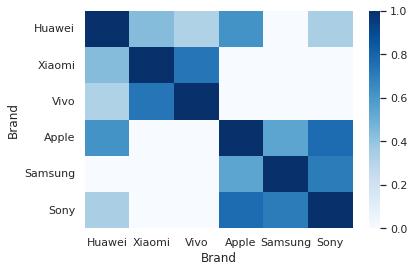

In [ ]:
# Use seaborn's heatmap to visualize tf-idf's similiarity
sns.heatmap(sim_tfidf_df, cmap="Blues")

### Create alternative recommender function

In [ ]:
# Define function to get recommendation using tf-idf from newly created dataframe
def get_recommendations_tfidf_df(brand):
    return sim_tfidf_df.filter([brand]).sort_values(brand, ascending=False)
get_recommendations_tfidf_df('Huawei') 

Brand,Huawei
Brand,
Huawei,1.000000
Apple,0.620789
Xiaomi,0.434783
Sony,0.336987
Vivo,0.318092
Samsung,0.000000


## My references:

https://medium.com/analytics-vidhya/content-based-recommender-systems-in-python-2b330e01eb80
https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html